In [161]:
import spacy
import pandas as pd
import networkx as nx
import textacy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [162]:
import matplotlib.pylab as plt
plt.rcParams['figure.dpi'] = 70

In [163]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("In the blockchain, bitcoins are registered to bitcoin address."
 "Users create a bitcoin address while picking a random private-key." 
 "The network computes the corresponding bitcoin address in a split second."
 "The network cannot compute the private key of a given bitcoin address, which is the reverse."
 "Users can tell others or make public a bitcoin address without compromising its corresponding private key."
 "The network will compute a key-pair that is already in use and has funds"
 "The owner must know the corresponding private key to make transactions. "
"The owner digitally signs the transaction."
"The network verifies the signature using the public key."
)

text_ext = textacy.extract.subject_verb_object_triples(doc)
list(text_ext)

[SVOTriple(subject=[bitcoins], verb=[are, registered], object=[to, bitcoin, address]),
 SVOTriple(subject=[Users], verb=[create], object=[bitcoin, address]),
 SVOTriple(subject=[network], verb=[computes], object=[bitcoin, address]),
 SVOTriple(subject=[network], verb=[can, not, compute], object=[key]),
 SVOTriple(subject=[Users], verb=[can, tell], object=[others]),
 SVOTriple(subject=[network], verb=[will, compute], object=[pair]),
 SVOTriple(subject=[owner], verb=[has, must, know], object=[key]),
 SVOTriple(subject=[owner], verb=[signs], object=[transaction])]

In [164]:
doc2 = nlp(
"Keys are compromised only by brute force."
"Keys are selected by owner."
"The owner is assigned a network."
)

text_ext2 = textacy.extract.subject_verb_object_triples(doc2)
right = list(text_ext2)
right

[SVOTriple(subject=[Keys], verb=[are, compromised], object=[force]),
 SVOTriple(subject=[Keys], verb=[are, selected], object=[owner]),
 SVOTriple(subject=[owner], verb=[is, assigned], object=[network])]

In [165]:
source_subject = ["bitcoins","Users","network","network","Users","network","owner","owner","Keys","Keys","owner","transaction"]
edge_verb = ["are registered","create","computes","can not compute","can tell","will compute","must know","signs","are compromised","are selected","is assigned","is cryptic"]
target_object = ["bitcoin address","bitcoin address","bitcoin address","key","others","pair","key","transaction","force","owner","network","blockchain"]

In [166]:
print(tuple(edge_verb))

('are registered', 'create', 'computes', 'can not compute', 'can tell', 'will compute', 'must know', 'signs', 'are compromised', 'are selected', 'is assigned', 'is cryptic')


In [167]:
kg = pd.DataFrame({'source':tuple(source_subject), 'target':tuple(target_object), 'edge':tuple(edge_verb)})

In [168]:
# create a directed-graph from a dataframe
G = nx.from_pandas_edgelist(kg, "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())
plt.figure(figsize=(15,15))
pos =  nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos, node_size = 200,width = 1,edgecolors='red')
nx.draw_networkx_edge_labels(G, pos=pos)
plt.show()

<IPython.core.display.Javascript object>

For Stock Sentiment

In [191]:
nlp = spacy.load("en_core_web_sm")
stock = nlp('GNATPro will be used for safety signalling system.' 
            'ENYSE to use AdaCore’s static and dynamic analysis tools.'
  'Startup lets users train with some of the world’s most famous athletes.'  
  'Experts say Bitcoin could reach $100,000 by the end of 2022.'
  'ADA started the year with a market cap of $5.5 billion and ended the year with a value of $1.46 in each coin.'
  'Enegra will be providing access to its Polygon-based EGX token to be wrapped on the Cardano Blockchain.'
  'Fabriik Weave has launched a crypto-to-crypto exchange for FYX Gaming.'
  'BTIG starts coverage of Renalytix with a buy rating and $24 price target. U.S. listed shares jumped at open, but momentum soon lost.'
  'Shares of Riot Blockchain tumble 55% since mid-November. Bitcoin is down by 39% since November’s all-time high.'
  'Social-media-platform Digitalage aims to make the internet more accessible.'
 'We are aware of the issue and are working to resolve it.'
  'Bitcoin sets new low at $39,893.62; Ethereum, Solana, Avalanche all trade lower.'
  'Head of trading at Global Prime expects ‘one more push higher’ for Bitcoin. He expects ‘large range’ for crypto prices next year.'
  'LinkedIn poll finds investors more confident in digital assets. Bitcoin ended the year up almost 65% in 2020.'
  'Largest coin is near what is known as the ‘death cross’. Ethereum briefly drops below key $3,000 level.'   
 'The total Bitcoin Equivalent mined by HIVE in 2021 was 4,032.'
  'LinkedIn poll finds investors more confident in digital assets. Bitcoin ended the year up almost 65% in 2020.'
  'Regulation is still the biggest overhang’ on crypto, strategist says. He expects more regulation on stablecoins in 2022.'
  '‘Non-fungible tokens’ will be bigger than bitcoin: O’Leary. ‘Cryptocurrency is like investing in the early days of Amazon’'
  'Bitcoin sets new low at $39,893.62; Ethereum, Solana, Avalanche all trade lower.'
  'We are aware of the issue and are working to resolve it.'
 'Head of trading at Global Prime expects ‘one more push higher’ for Bitcoin. He expects ‘large range’ for crypto prices next year.'
  'Social-media-platform released a year-end ‘Reddit Recap’. Crypto was the most popular topic on the platform in 2021.'
  'A look at some of the major trends that dominated crypto in 2021.'
  'Is Dogecoin the best cryptocurrency to buy in 2022?'
  'We are aware of the issue and are working to resolve it.'
  'Is Dogecoin a good long-term investment? Dogecoin has been in a consistent downtrend since peaking last May.'
  'The team aims to work in taking the crypto gaming market to the next level.'
  'Experts say Bitcoin could reach $100,000 by the end of 2022.'
  'Ether, Dogecoin and Shiba Inu were big winners in 2021. Bitcoin, Ethereum, Solana, Polygon and Terra also in spotlight.'
  "Dogecoin co-creator says he owns around 220,000 of the cryptocurrency. His holdings translate to about $40,000, based on Tuesday's price."
  'He expects ‘large range’ for crypto prices next year.'         )

In [192]:
stock_ext = textacy.extract.subject_verb_object_triples(stock)
a = list(stock_ext)
a

[SVOTriple(subject=[Startup], verb=[lets], object=[athletes]),
 SVOTriple(subject=[Bitcoin], verb=[could, reach], object=[100,000]),
 SVOTriple(subject=[Enegra], verb=[will, be, providing], object=[access]),
 SVOTriple(subject=[Fabriik, Weave], verb=[has, launched], object=[exchange]),
 SVOTriple(subject=[BTIG], verb=[starts], object=[coverage]),
 SVOTriple(subject=[platform, Digitalage], verb=[aims], object=[to, make, the, internet, more, accessible]),
 SVOTriple(subject=[Bitcoin], verb=[sets], object=[low]),
 SVOTriple(subject=[He], verb=[expects], object=[range]),
 SVOTriple(subject=[Bitcoin], verb=[ended], object=[year]),
 SVOTriple(subject=[Bitcoin], verb=[ended], object=[year]),
 SVOTriple(subject=[He], verb=[expects], object=[regulation]),
 SVOTriple(subject=[He], verb=[expects], object=[range]),
 SVOTriple(subject=[media, platform], verb=[released], object=[Reddit, Recap]),
 SVOTriple(subject=[that], verb=[dominated], object=[crypto]),
 SVOTriple(subject=[team], verb=[aims], ob

In [196]:
for w in a:
    print(w[0])

[Startup]
[Bitcoin]
[Enegra]
[Fabriik, Weave]
[BTIG]
[platform, Digitalage]
[Bitcoin]
[He]
[Bitcoin]
[Bitcoin]
[He]
[He]
[media, platform]
[that]
[team]
[Bitcoin]
[Shiba, Inu]
[He]


In [204]:
sub_arr = [['Startup'],['Bitcoin'],['Enegra'],['Fabriik Weave'],['BTIG'],['platform Digitalage'],['Bitcoin'],['He'],['Bitcoin'],['Bitcoin'],['He'],['He'],['media platform'],['that'],['team'],['Bitcoin'],['Shiba Inu'],['He']]
sub_result = []
for a in sub_arr:
    for item in a:
        sub_result.append(item)
print(sub_result)

['Startup', 'Bitcoin', 'Enegra', 'Fabriik Weave', 'BTIG', 'platform Digitalage', 'Bitcoin', 'He', 'Bitcoin', 'Bitcoin', 'He', 'He', 'media platform', 'that', 'team', 'Bitcoin', 'Shiba Inu', 'He']


In [205]:
edge_arr = [['lets'],['could reach'],['will be providing'],['has launched'],['starts'],['aims'],['sets'],['expects'],['ended'],['ended'],['expects'],['expects'],['released'],['dominated'],['aims'],['could reach'],['were'],['expects']]
edge_result = []

for b in edge_arr:
    for bitem in b:
        edge_result.append(bitem)
print(edge_result)


['lets', 'could reach', 'will be providing', 'has launched', 'starts', 'aims', 'sets', 'expects', 'ended', 'ended', 'expects', 'expects', 'released', 'dominated', 'aims', 'could reach', 'were', 'expects']


In [206]:
obj_arr = [['athletes'],['100000'],['access'],['exchange'],['coverage'],['to make the internet more accessible'],['low'],['range'],['year'],['year'],['regulation'],['range'],['Reddit Recap'],['crypto'],['to work in taking the crypto gaming market to the next level'],['100000'],['100000'],['range']]
obj_result = []

for c in obj_arr:
    for citem in c:
        obj_result.append(citem)
print(obj_result)

['athletes', '100000', 'access', 'exchange', 'coverage', 'to make the internet more accessible', 'low', 'range', 'year', 'year', 'regulation', 'range', 'Reddit Recap', 'crypto', 'to work in taking the crypto gaming market to the next level', '100000', '100000', 'range']


In [210]:
len(sub_arr)

18

In [211]:
len(edge_arr)

18

In [212]:
len(obj_arr)

18

In [207]:
len(sub_result)

18

In [190]:
len(edge_result)

18

In [208]:
len(obj_result) 

18

In [209]:
sub_result = tuple(sub_result)
edge_result = tuple(edge_result)
obj_result = tuple(obj_result)

In [214]:
kgraph = pd.DataFrame({'Source': sub_result, 'Target': obj_result, 'Edge': edge_result})


<IPython.core.display.Javascript object>


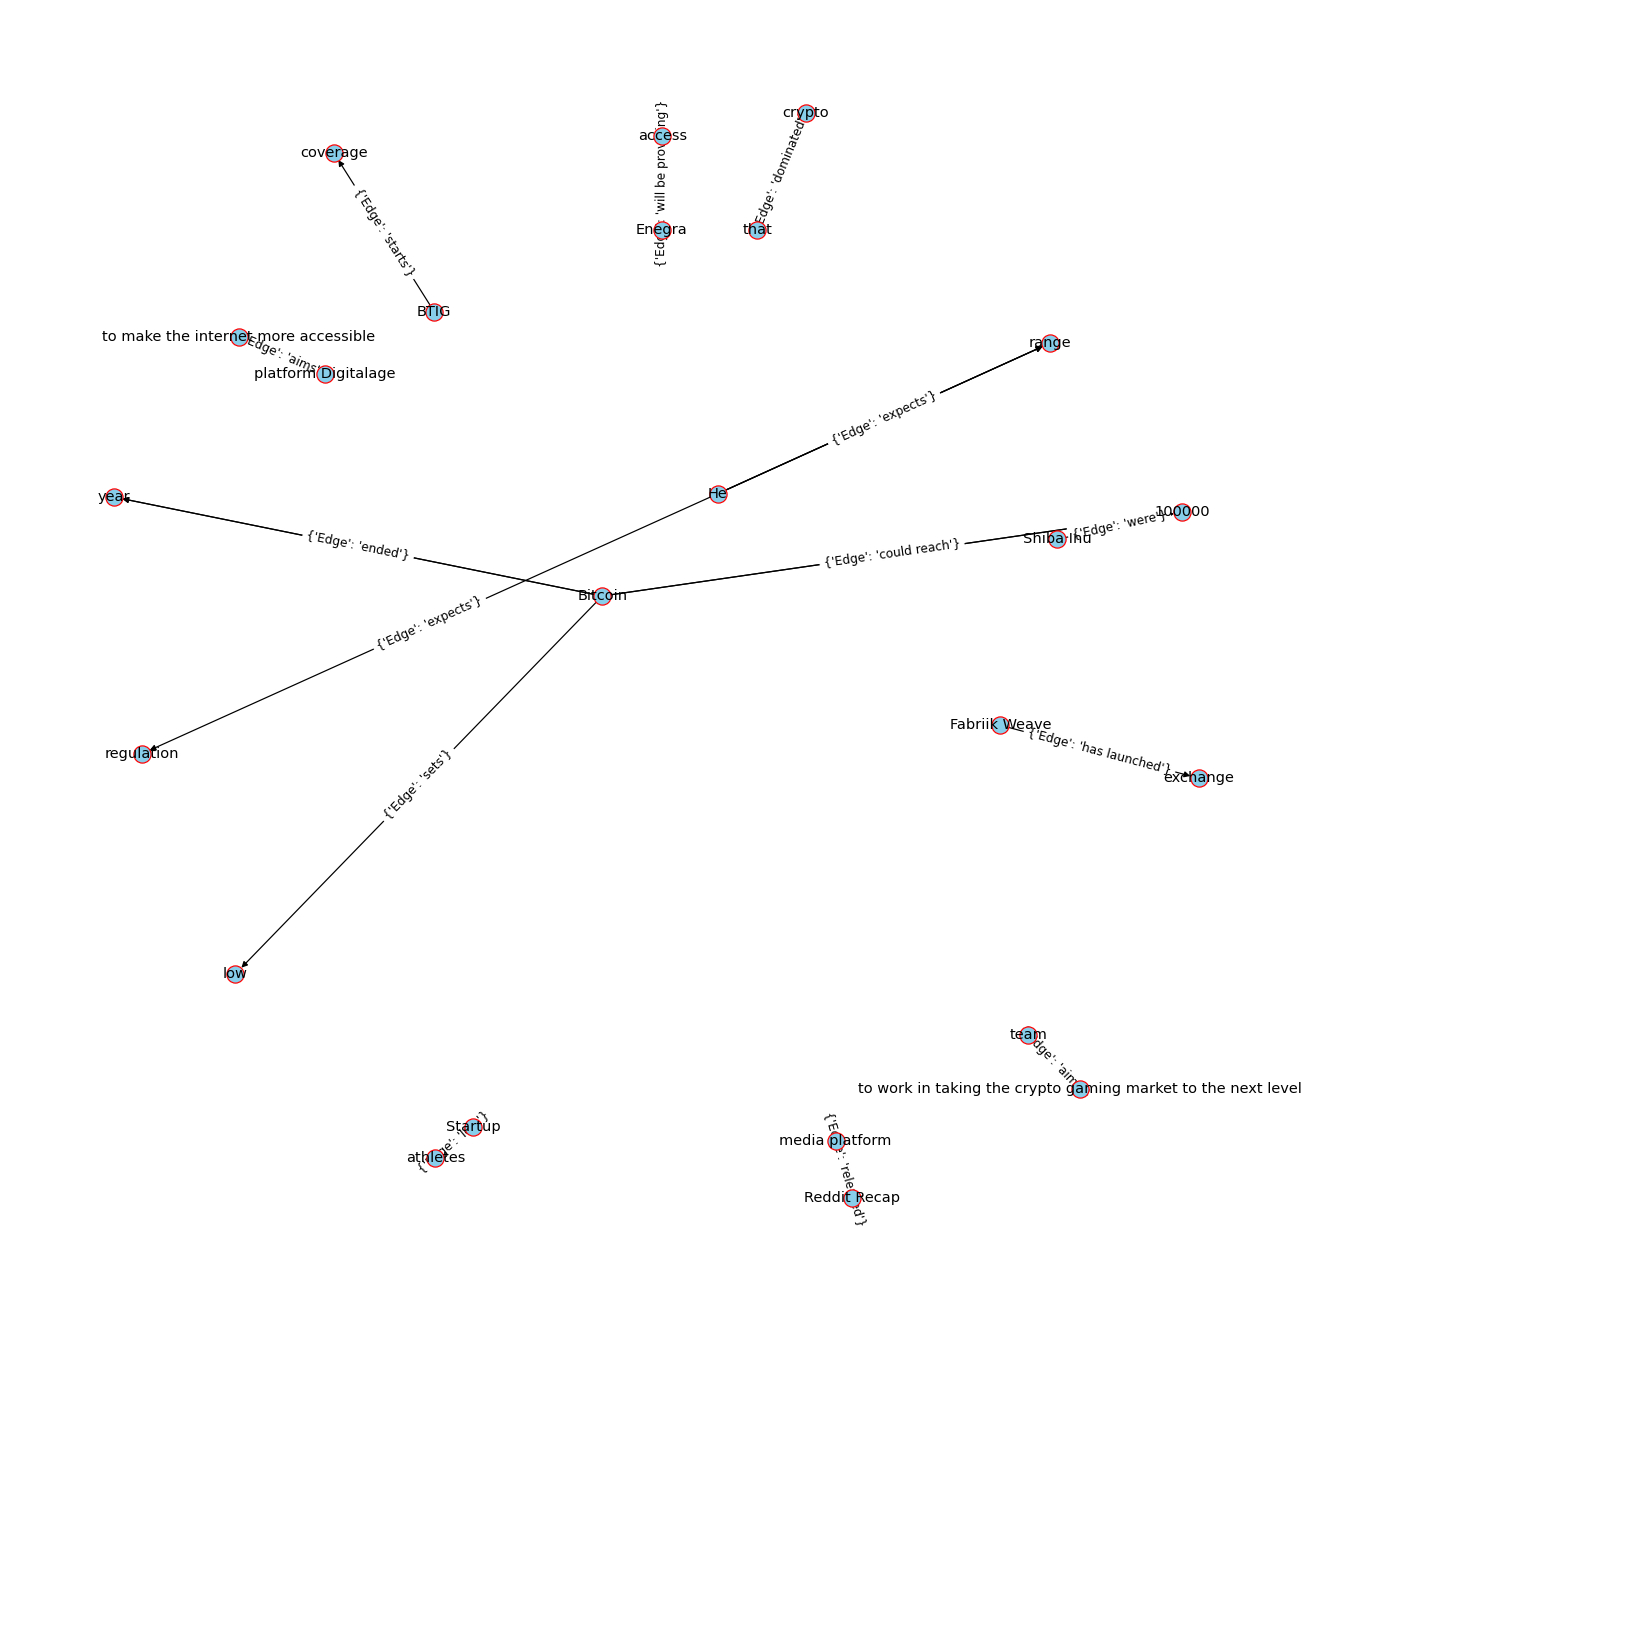

In [216]:
# create a directed-graph from a dataframe
G = nx.from_pandas_edgelist(kgraph, "Source", "Target", edge_attr=True, create_using=nx.MultiDiGraph())
plt.figure(figsize=(15,15))
pos =  nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos, node_size = 200,width = 1,edgecolors='red')
nx.draw_networkx_edge_labels(G, pos=pos)
plt.show()